In [3]:
import cv2
import os
import skimage.draw
import skimage.transform
import skimage.morphology
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
export_parallel = True
use_graph = True

### Листинг 1.3 Поиск линий в пространстве Хафа через OpenCV

Особенностью реализации любого алгоритмов в OpenCV является возможность работы в реальном времени 
за счёт низкоуровневой оптимизации. 

Особенностью большинства алгоритмов в OpenCV является поддержка вычислений 
на GPU, ускоряющая работу в сотни раз.

**Параметры**

rho - Разрешение накопителя по расстоянию в пикселях.

theta - Угловое разрешение аккумулятора в радианах.

threshold - Параметр порога накопления. Возвращаются только те строки, которые набрали достаточное количество голосов (> порога).

minLineLength - Минимальная длина линии. Сегменты линии короче этого значения отклоняются.

maxLineGap - Максимально допустимый промежуток между точками на одной линии для их соединения.

In [4]:
images = [cv2.cvtColor(cv2.imread(f"data/lines/{image_path}"), cv2.COLOR_BGR2GRAY) for image_path in os.listdir("data/lines")]

# Поиск линий через преобразование Хафа для исходного изображения.
if use_graph:
    hough_lines = []
    for image in images:
        image = cv2.GaussianBlur(image, (5, 5), 0)
        image = cv2.Canny(image, 100, 300, apertureSize=3)
        lines = cv2.HoughLinesP(
            image, 
            rho = 1, 
            theta = np.pi/180, 
            threshold = 70, 
            minLineLength = 50, 
            maxLineGap = 10
        )
        hough_lines.append(lines)

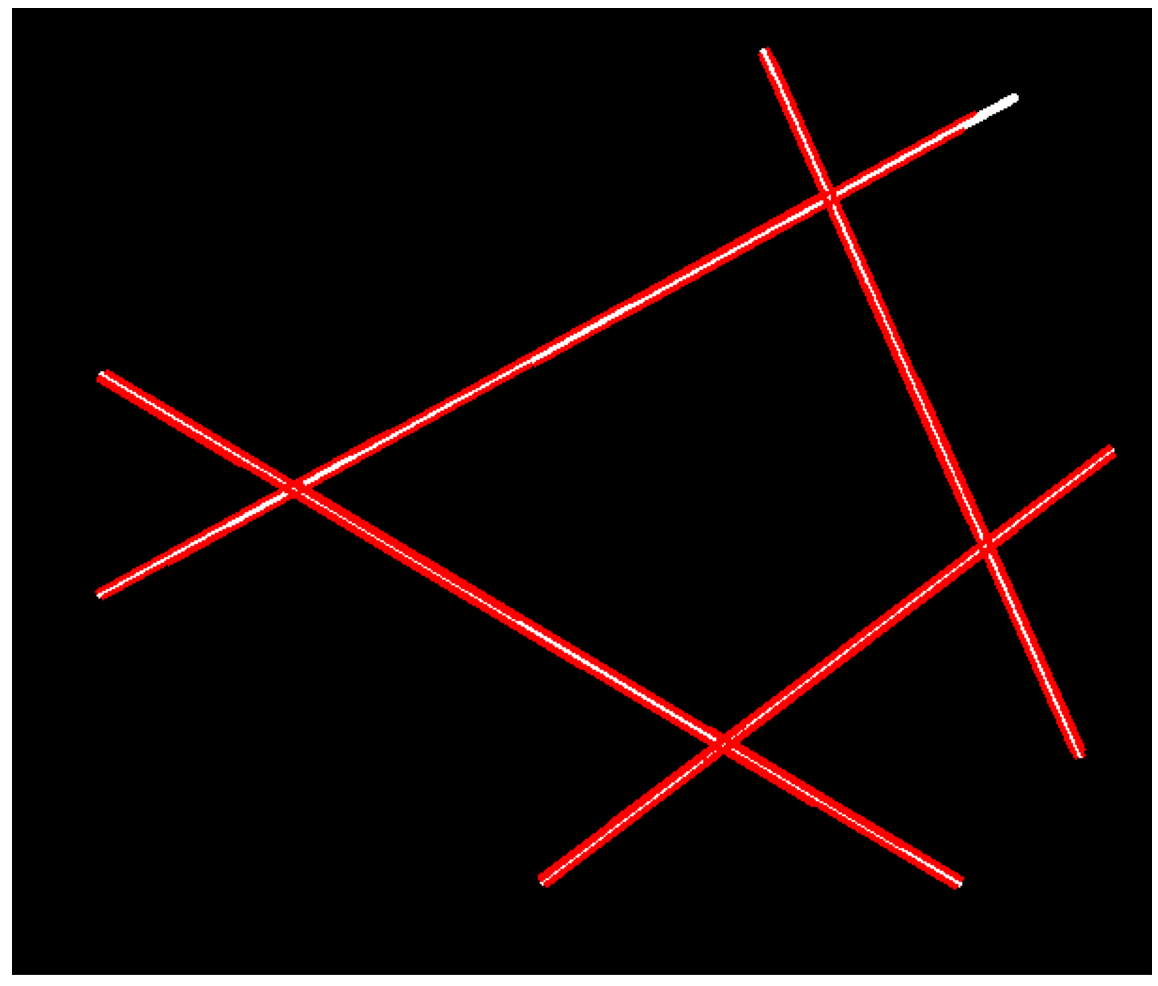

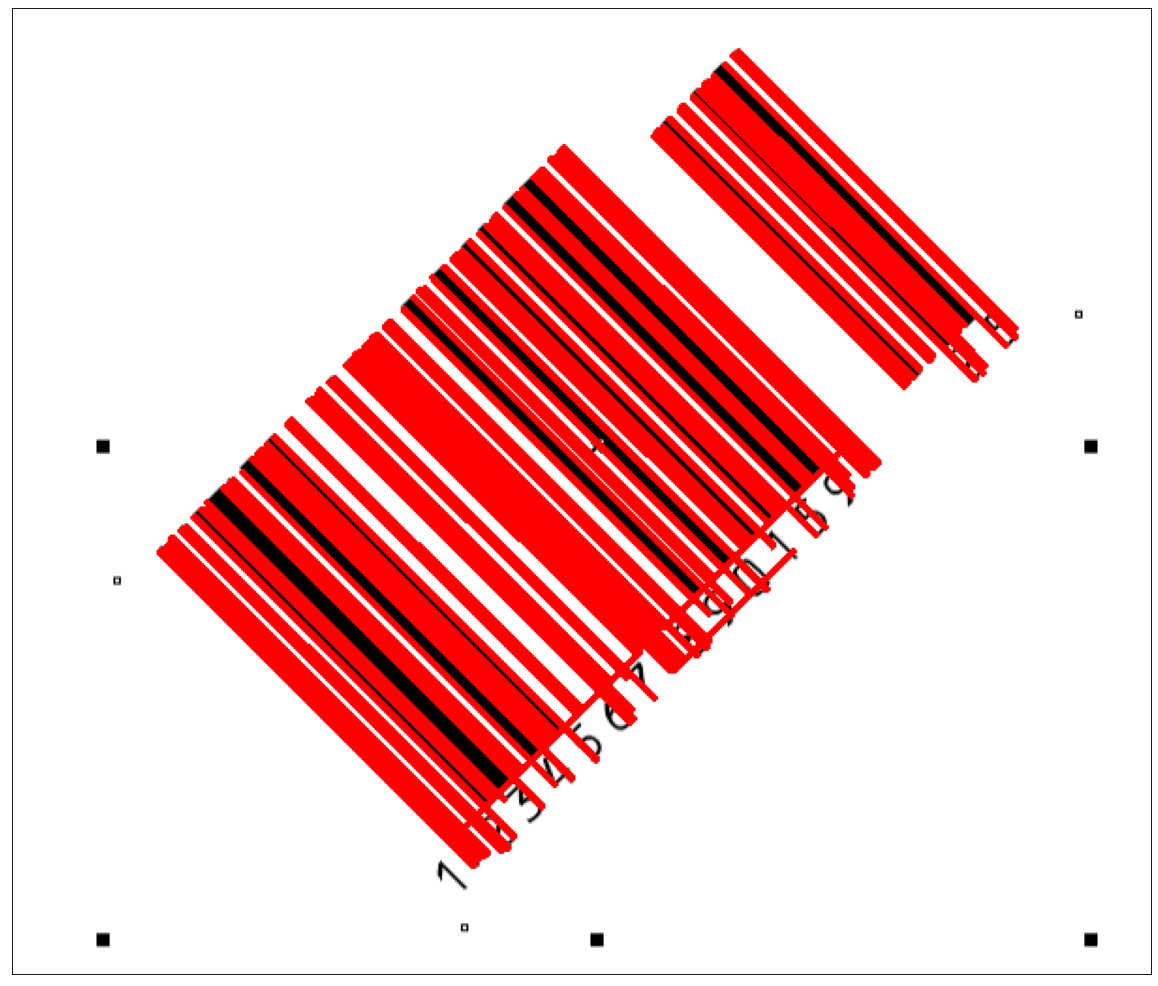

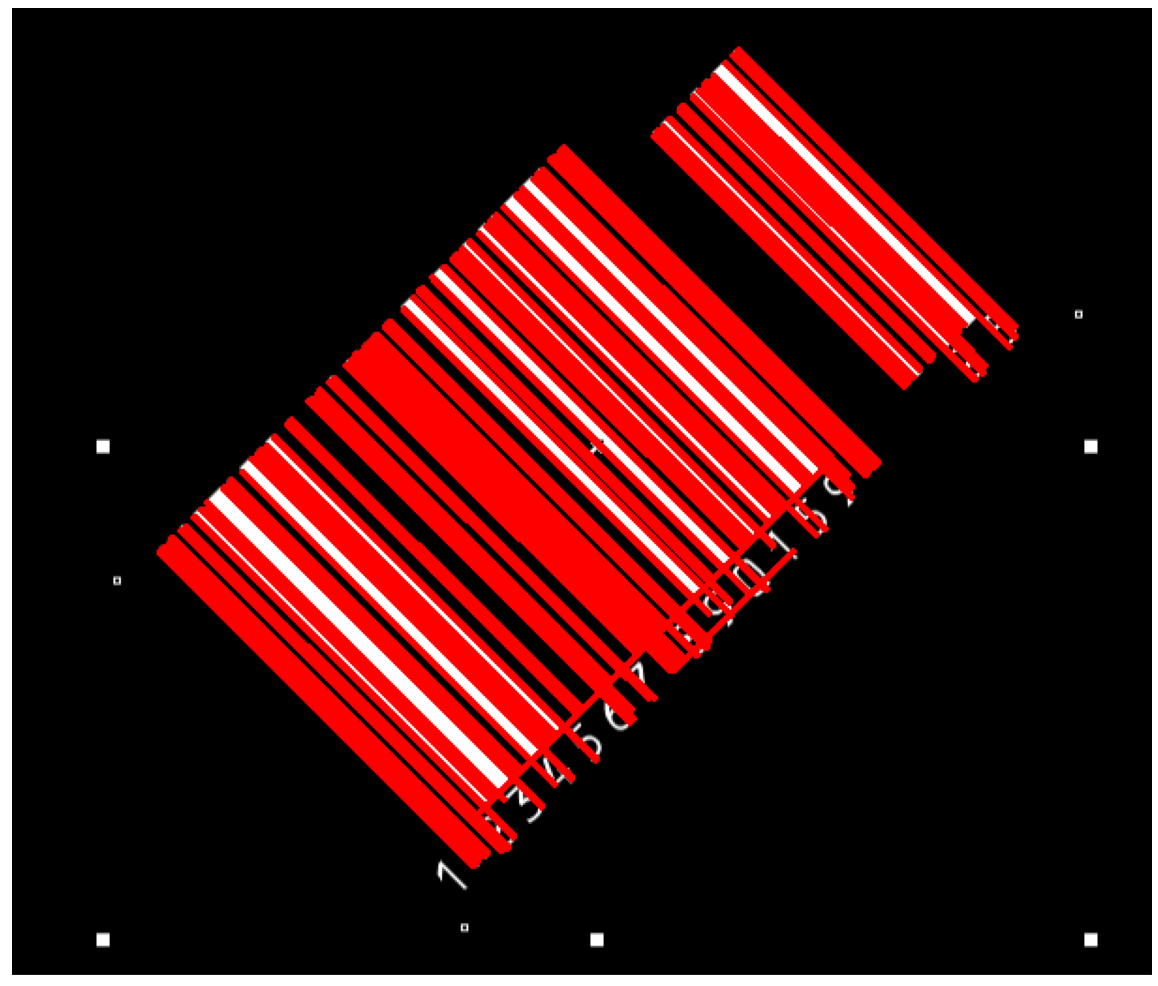

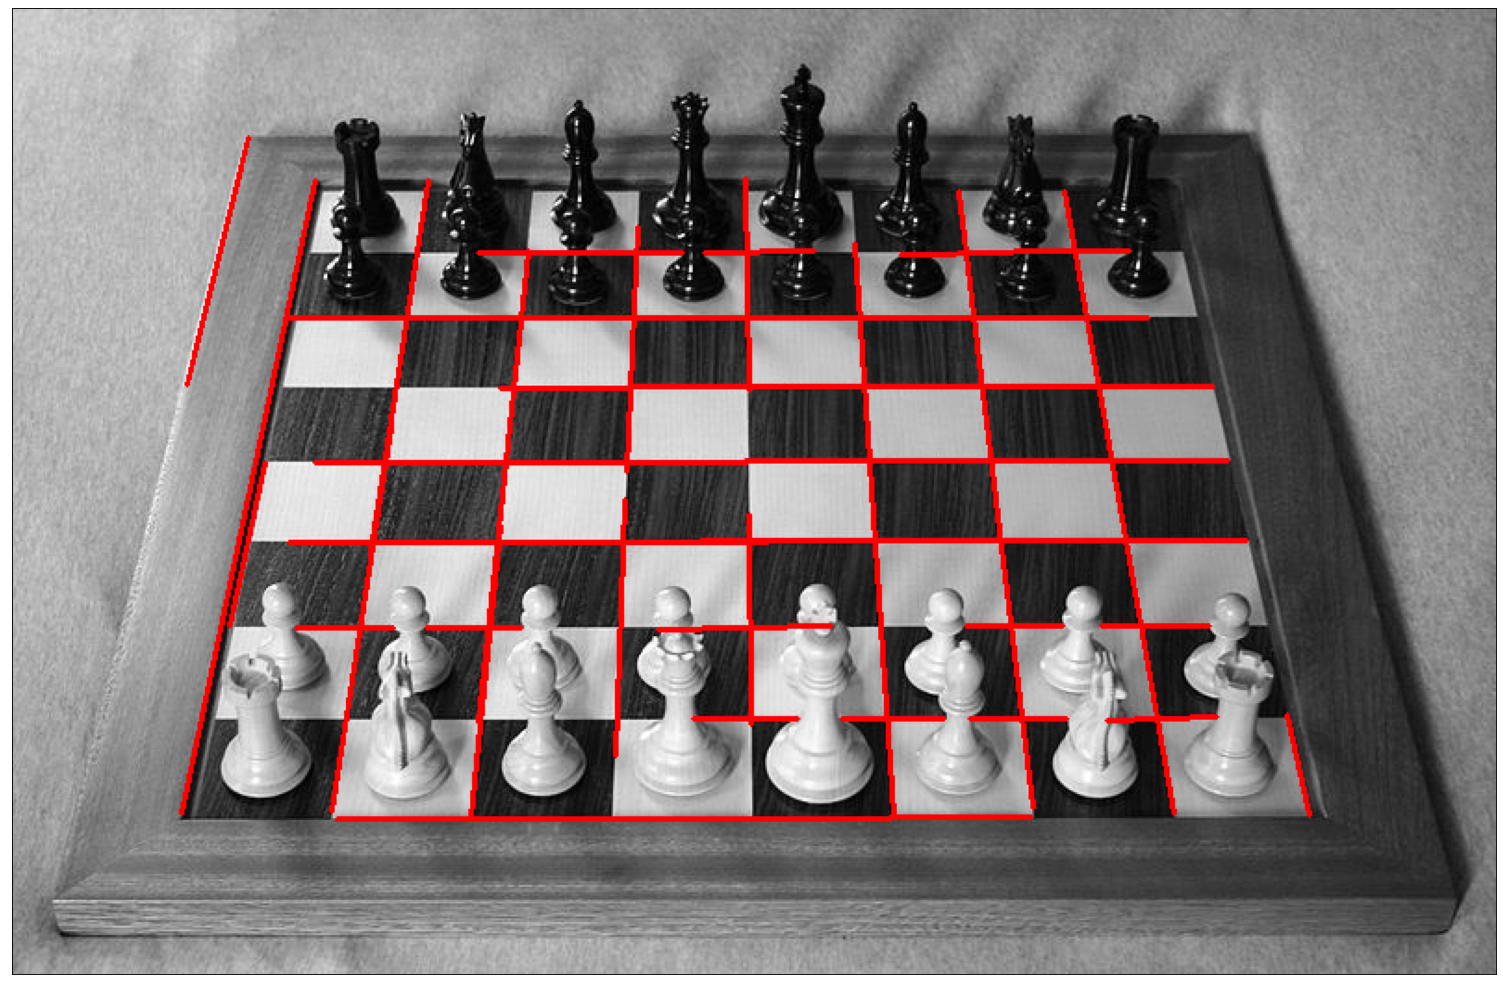

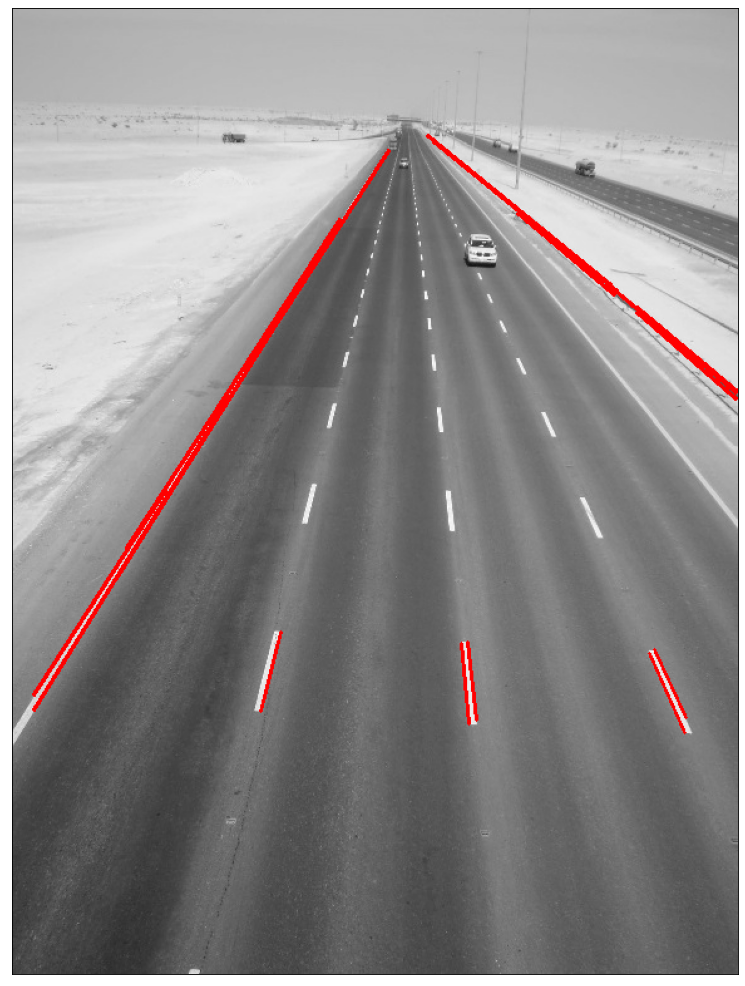

In [5]:
if use_graph:
    for index, image in enumerate(images):
        figure(figsize=(32, 16), dpi=80)
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        lines = np.uint16(np.around(hough_lines[index]))
        for x1,y1,x2,y2 in lines[:,0]:
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)
        plt.imshow(image)
        plt.xticks([]),plt.yticks([])
        plt.show()

### Листинг 1.4 Поиск окружностей в пространстве Хафа через OpenCV

Особенностью реализации (да, снова) поиска окружностей в пространстве Хафа является встроенный детектор контуров.

**Параметры**

**method** - Метод определения, см. HoughModes. Доступные методы - HOUGH_GRADIENT и HOUGH_GRADIENT_ALT.

**dp** - Обратное отношение разрешения аккумулятора к разрешению изображения. Например, если dp=1, аккумулятор имеет такое же разрешение, как и входное изображение. Если dp=2 , аккумулятор имеет вдвое меньшую ширину и высоту. Для HOUGH_GRADIENT_ALT рекомендуемое значение dp=1.5, если только не нужно обнаружить очень маленькие круги.

**minDist** - Минимальное расстояние между центрами обнаруженных окружностей. Если параметр слишком мал, могут быть ложно обнаружены несколько соседних окружностей в дополнение к одной истинной. Если параметр слишком велик, некоторые окружности могут быть пропущены.

**param1** - Первый специфический для метода параметр. В случае HOUGH_GRADIENT и HOUGH_GRADIENT_ALT это больший порог из двух, передаваемых детектору краев Канни (меньший в два раза меньше). Обратите внимание, что HOUGH_GRADIENT_ALT использует алгоритм Шарра для вычисления производных изображения, поэтому пороговое значение обычно должно быть выше, например, 300 или нормально экспонированные и контрастные изображения.

**param2** - Второй параметр, специфичный для метода. В случае HOUGH_GRADIENT это порог накопления для центров окружностей на этапе обнаружения. Чем он меньше, тем больше ложных окружностей может быть обнаружено. Круги, соответствующие большим значениям аккумулятора, будут возвращены первыми. В случае алгоритма HOUGH_GRADIENT_ALT это мера "идеальности" окружности. Чем ближе он к 1, тем лучшие по форме круги выбирает алгоритм. В большинстве случаев 0,9 будет вполне достаточно. Если вы хотите получить лучшее обнаружение маленьких кругов, вы можете уменьшить его до 0,85, 0,8 или даже меньше. Но тогда также постарайтесь ограничить диапазон поиска [minRadius, maxRadius], чтобы избежать большого количества ложных окружностей.

**minRadius** - Минимальный радиус окружности.

**maxRadius** - Максимальный радиус окружности. Если <= 0, используется максимальный размер изображения. Если < 0, HOUGH_GRADIENT возвращает центры без нахождения радиуса. HOUGH_GRADIENT_ALT всегда вычисляет радиусы окружностей.

In [6]:
images = [cv2.cvtColor(cv2.imread(f"data/circles/{image_path}"), cv2.COLOR_BGR2GRAY) for image_path in os.listdir("data/circles")]

# Поиск окружностей любого радиуса от 30 пикселей через преобразование Хафа для исходного изображения.
if use_graph:
    hough_circles = []
    for image in images:
        image = cv2.medianBlur(image, 7)
        circles = cv2.HoughCircles(
            image,
            method=cv2.HOUGH_GRADIENT_ALT,
            dp=1.5,
            minDist=20,
            param1=300,
            param2=0.7,
            minRadius=30,
            maxRadius=0
        )
        hough_circles.append(circles)

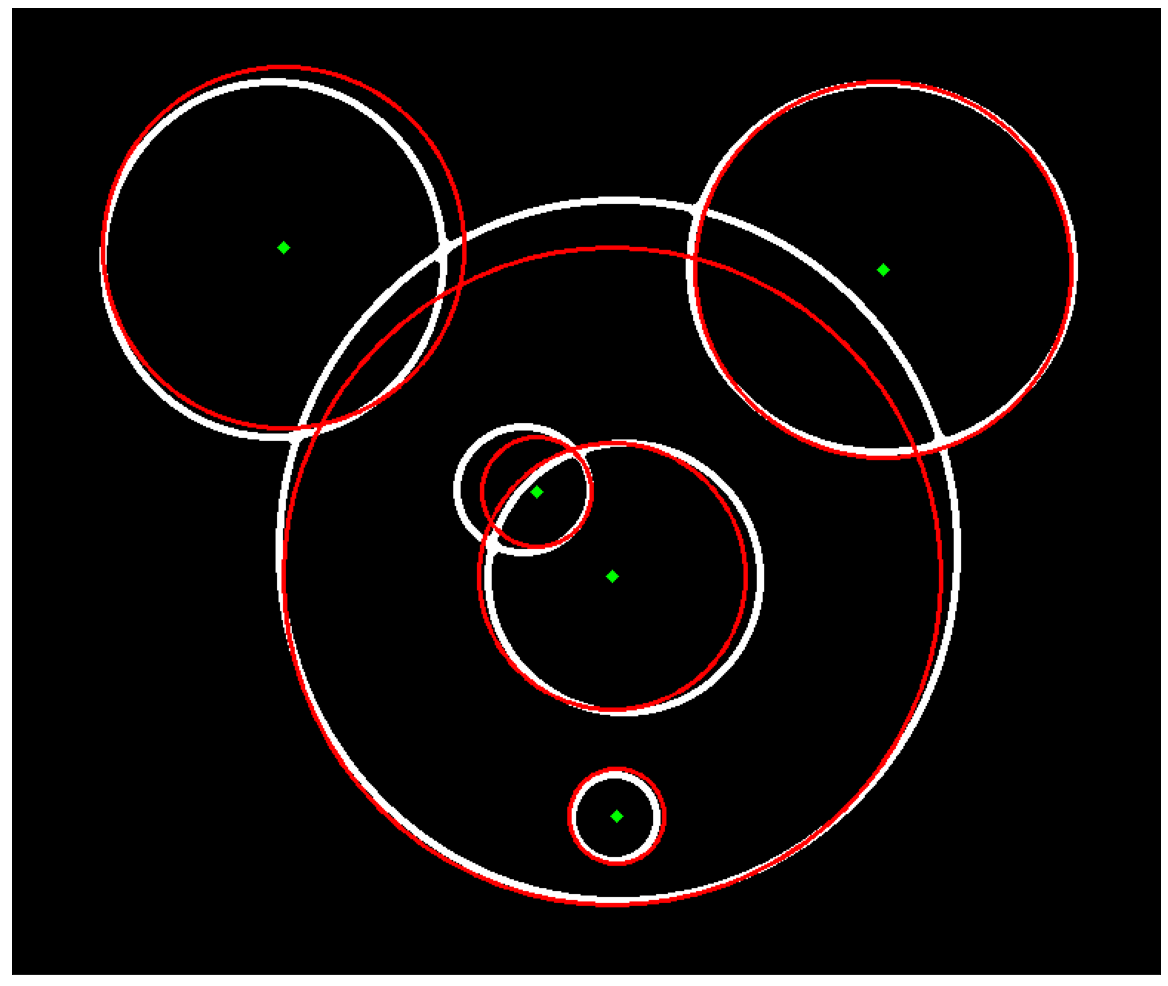

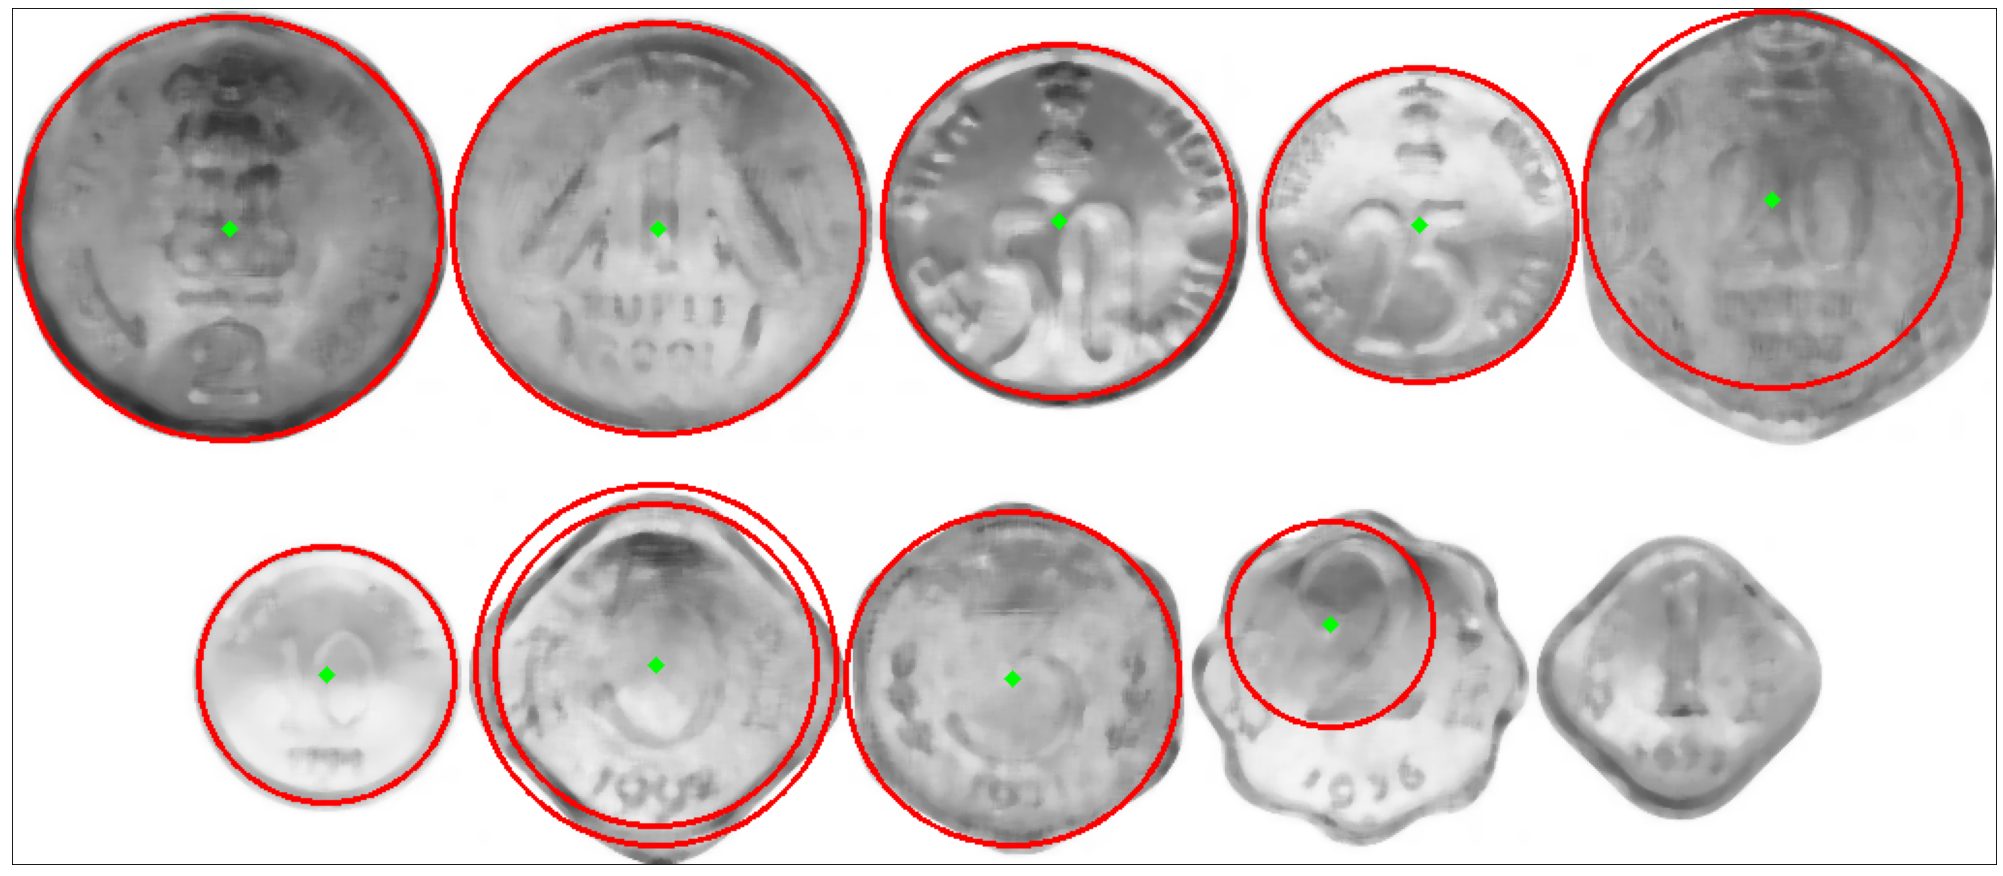

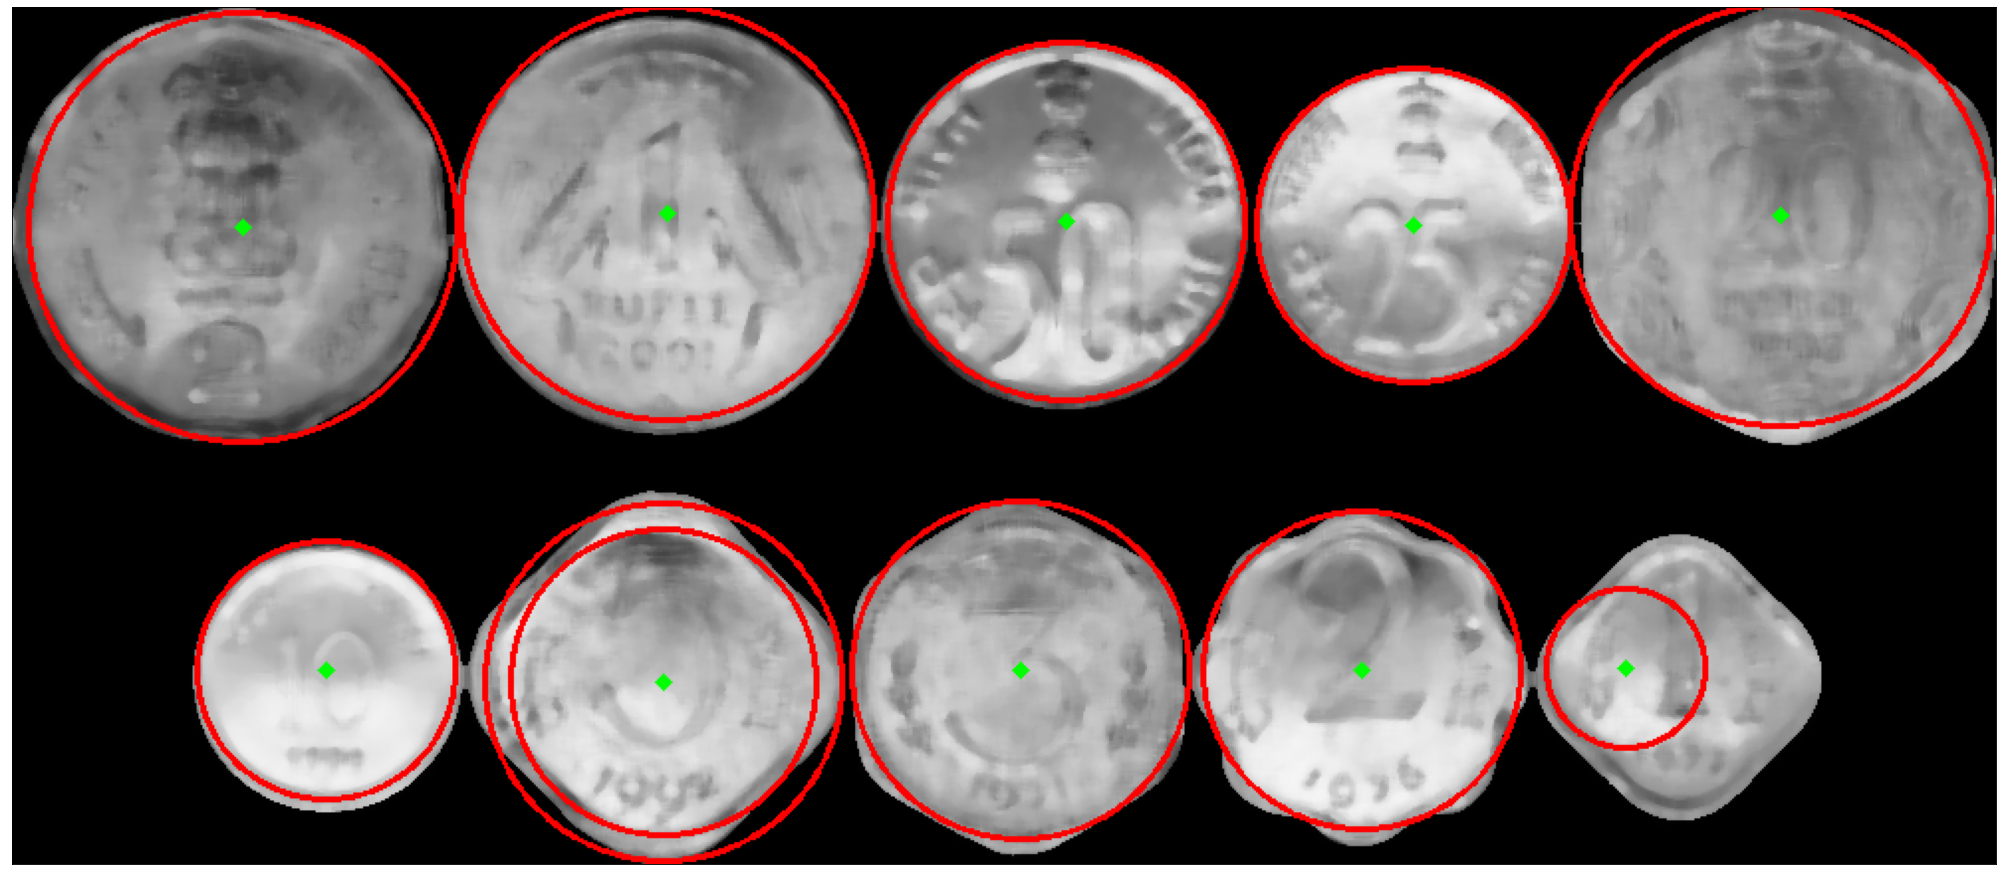

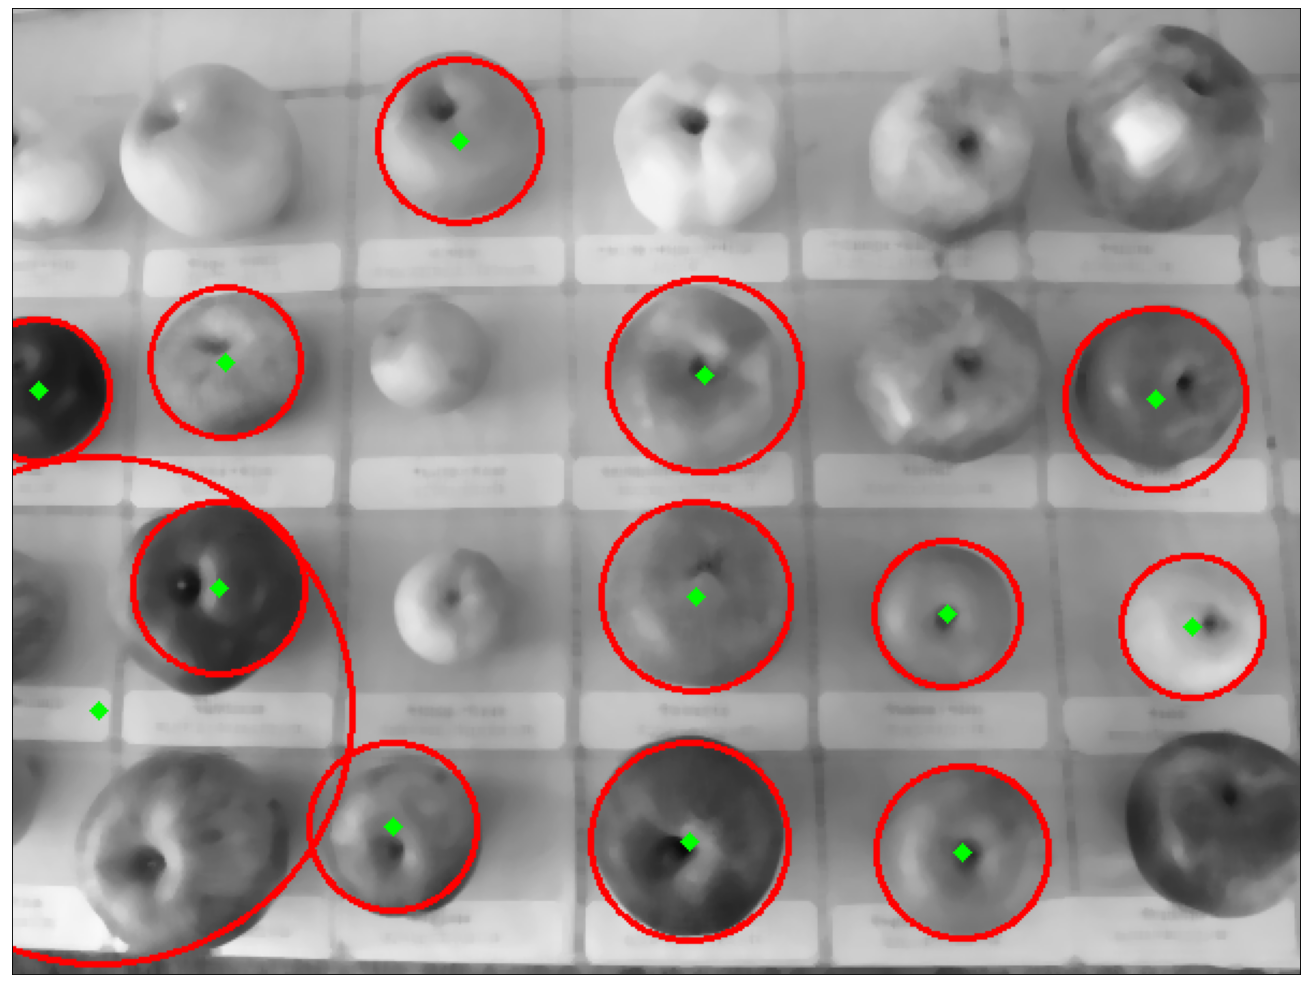

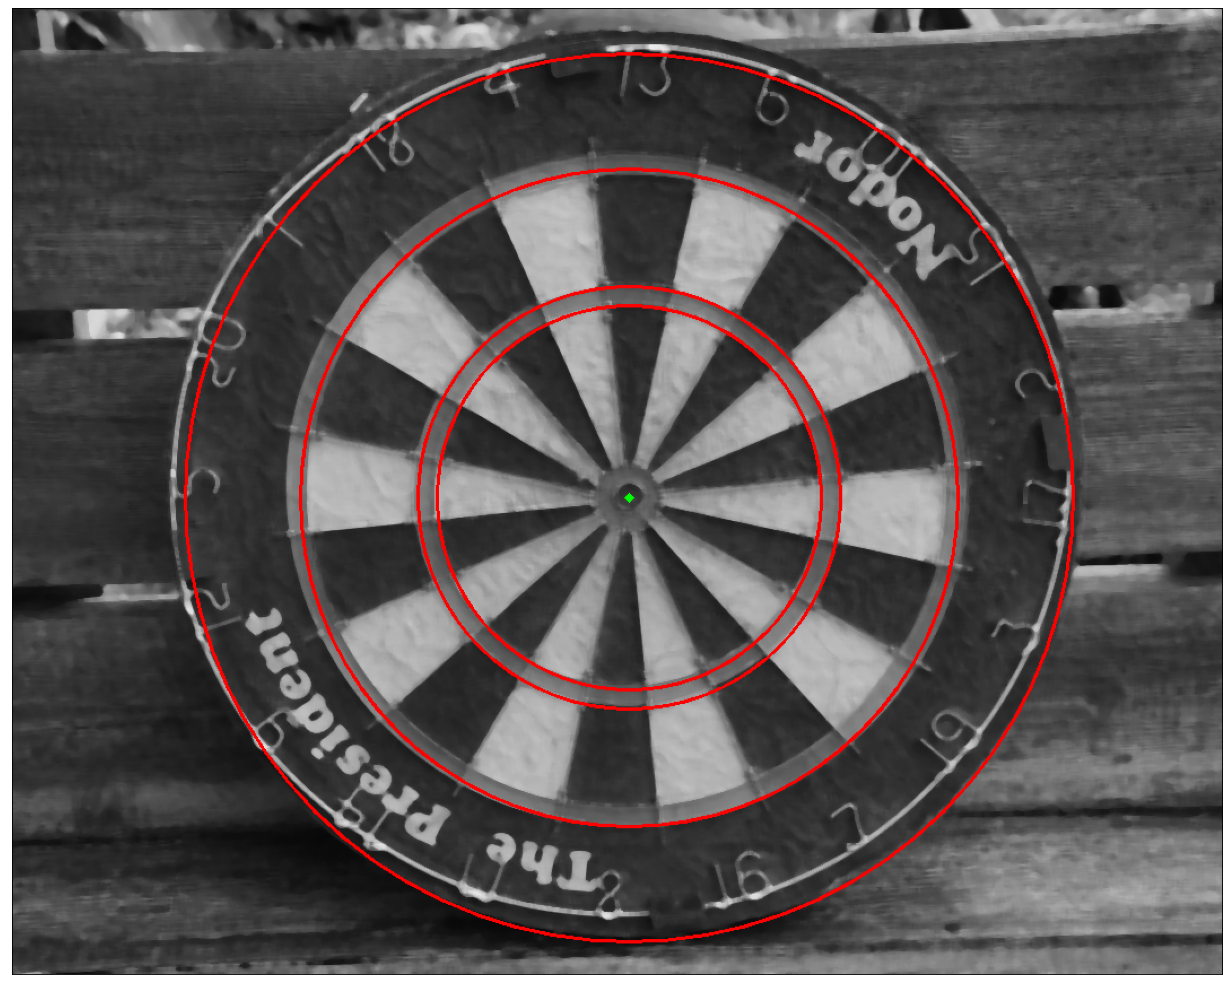

In [7]:
if use_graph:
    for index, image in enumerate(images):
        figure(figsize=(32, 16), dpi=80)
        image = cv2.medianBlur(image, 7)
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        circles = np.uint16(np.around(hough_circles[index]))
        for i in circles[:,0]:
            cv2.circle(image,(i[0],i[1]),i[2],(255,0,0),2) # draw the outer circle
            cv2.circle(image,(i[0],i[1]),2,(0,255,0),3) # draw the center of the circle
        plt.imshow(image)
        plt.xticks([]),plt.yticks([])
        plt.show()
